In [1]:
import pandas as pd
import numpy as np
import random
from rdkit import Chem
from snn_model import get_loss_fn
import torch

from snntorch import spikegen, surrogate
import matplotlib.pyplot as plt
from utils import load_dataset_df



No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\knsve\Desktop\MEI\Tese\torch\snn_venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-geometri

In [2]:
files = ['tox21.csv','sider.csv', 'BBBP.csv']
dt_file = files[0]
dirname = dt_file.removesuffix('.csv')

df, targets = load_dataset_df(filename=dt_file)

for t in targets:
    df_temp = df[[t, 'smiles']].dropna()
    class_counts = df[t].count()
    class_sum = df[t].sum()
    print(t, class_counts, class_sum) 

NR-AR 7265 309.0
NR-AR-LBD 6758 237.0
NR-AhR 6549 768.0
NR-Aromatase 5821 300.0
NR-ER 6193 793.0
NR-ER-LBD 6955 350.0
NR-PPAR-gamma 6450 186.0
SR-ARE 5832 942.0
SR-ATAD5 7072 264.0
SR-HSE 6467 372.0
SR-MMP 5810 918.0
SR-p53 6774 423.0


In [3]:
a = torch.Tensor([1, 1, 1, 0, 0, 0, 0])
spikegen.latency(a, num_steps=10, normalize=True)

tensor([[1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1.]])

[-0.5278899  -0.0445745   0.36040884]
[-0.12575501 -0.10628435 -0.48419774]
[0.5300273  0.1558922  0.03810972]
[-0.26381356  0.09124994 -0.24448618]
[-0.05049258 -0.39434376 -0.5761654 ]
[0.5159093  0.45347595 0.10118836]
[-0.50663674  0.31997323 -0.06583017]
[ 0.29264307 -0.01625663  0.5766401 ]


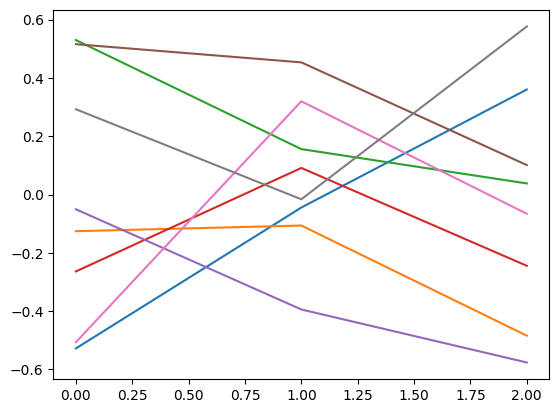

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a Conv1D layer
conv1d = nn.Conv1d(in_channels=1, out_channels=8, kernel_size=3, dilation=2)

# Get the weights (kernels)
kernels = conv1d.weight.detach().cpu().numpy()  # Shape: (out_channels, in_channels, kernel_size)

# Plot the kernels
for i, kernel in enumerate(kernels):

    print(kernel[0])
    plt.plot(kernel[0], label=f'Filter {i}')
    

In [13]:
import snntorch as snn
neuron = snn.Leaky(beta=0.95)
print(neuron.threshold)

tensor(1.)
